In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sb
import sqlite3

In [2]:
df = pd.read_csv("Final_data.csv")

In [3]:
new_df = df.drop(["meal_name", "Workout_Type", "meal_type", "diet_type", "cooking_method", "Name of Exercise", "Benefit", "Target Muscle Group", "Equipment Needed", "Body Part", "Type of Muscle", "Workout", "Burns_Calories_Bin"], axis=1)
new_df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
new_df["Difficulty Level"] = df["Difficulty Level"].map({"Beginner": 0, "Intermediate": 1, "Advanced": 2})

new_df['Experience_Level'] = df['Experience_Level'].round()

In [4]:
new_df.to_csv('test.csv')

In [5]:
clean_df = new_df.drop(["Age", "Gender", "Fats", "sugar_g", "Daily meals frequency", "Carbs", "cholesterol_mg", "prep_time_min", "rating", "Reps", "Difficulty Level", "serving_size_g", "Sets", "cook_time_min"], axis=1)
clean_df = clean_df.drop(["Max_BPM", "Resting_BPM", "Calories_Burned", "Burns Calories (per 30 min)", "pct_maxHR", "Avg_BPM", "sodium_mg", "pct_carbs", "pct_HRR"], axis=1)

<Axes: >

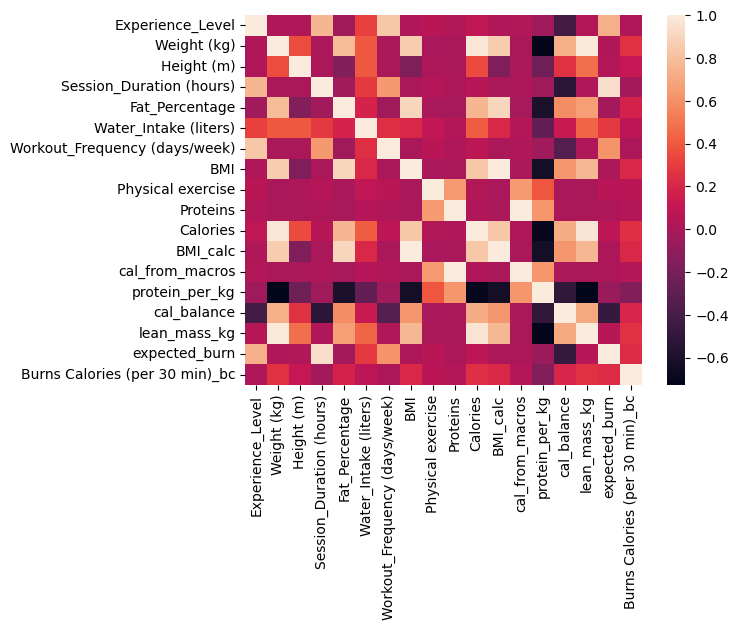

In [6]:
cor = clean_df.corr(method="pearson", min_periods=1, numeric_only=False)
order = ["Experience_Level"] + [col for col in cor.columns if col != 'Experience_Level']
cor = cor.loc[order, order]
sb.heatmap(cor)

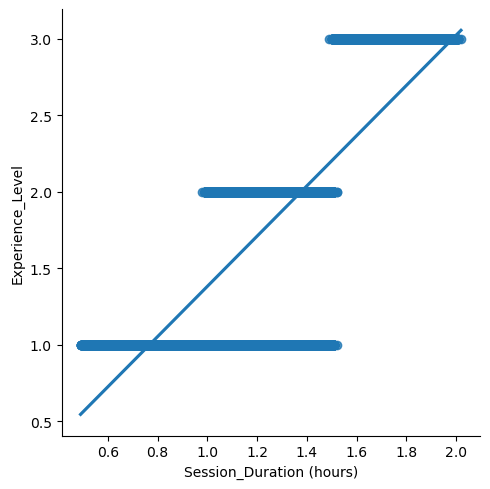

In [7]:
sb.lmplot(data=clean_df, x='Session_Duration (hours)', y='Experience_Level')

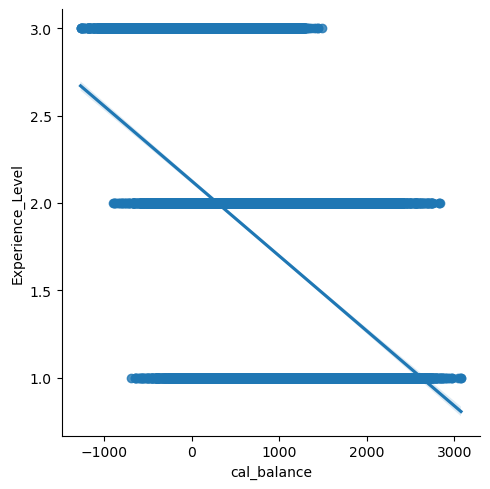

In [8]:
sb.lmplot(data=clean_df, x='cal_balance', y='Experience_Level')

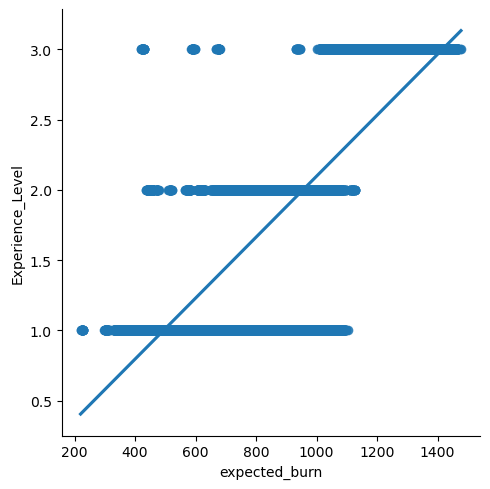

In [9]:
sb.lmplot(data=clean_df, x='expected_burn', y='Experience_Level')

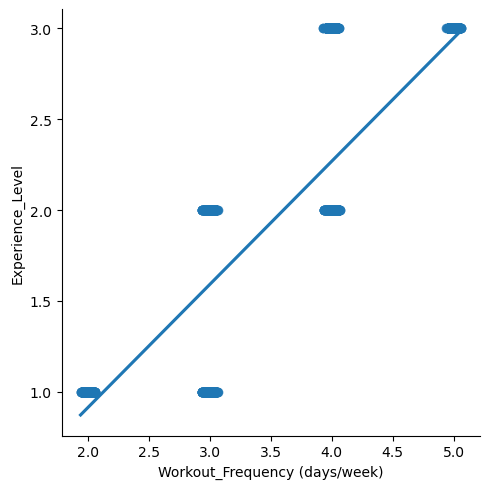

In [10]:
sb.lmplot(data=clean_df, x='Workout_Frequency (days/week)', y='Experience_Level')

In [11]:
from sklearn.model_selection import train_test_split

X = clean_df[['Session_Duration (hours)', 'expected_burn', 'Workout_Frequency (days/week)']]
y = clean_df['Experience_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier(alpha=.5)
model.fit(X_train, y_train)

RidgeClassifier(alpha=0.5)

In [13]:
model.score(X_test, y_test)

0.7855

In [20]:
from sklearn.model_selection import train_test_split

X = clean_df[['expected_burn', 'Workout_Frequency (days/week)', 'Session_Duration (hours)']]
y = clean_df['Experience_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train, y_train)

MLPClassifier()

In [16]:
model.score(X_test, y_test)

0.865

In [19]:
model.predict([[12, 32, 12]])

C:\Users\demoexam\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([3.])

# Сохраняю наилучшую модель MLPClassifier

In [18]:
import pickle

with open("server/models/experience_level.bytes", "wb") as f:
    pickle.dump(model, f)